In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import altair as alt
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

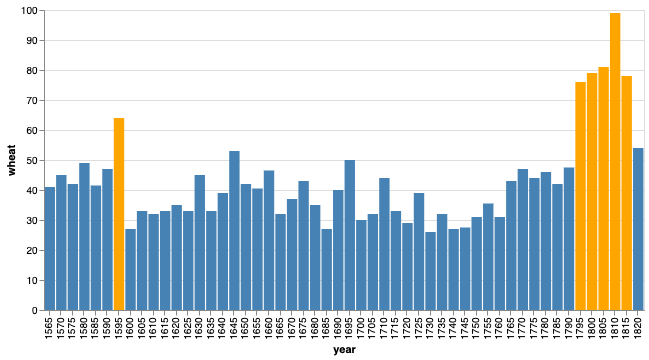

In [2]:
# Conditional Highlighting
source = data.wheat()

alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='wheat:Q',
    # The highlight will be set on the result of of a conditional statement
    color= alt.condition(
        alt.datum.wheat > 60,
        alt.value('orange'),    # If statment is true, the bar will be orange.
        alt.value('steelblue')  # If statment not true, bar will be set to blue.
    )
).properties(width=600)

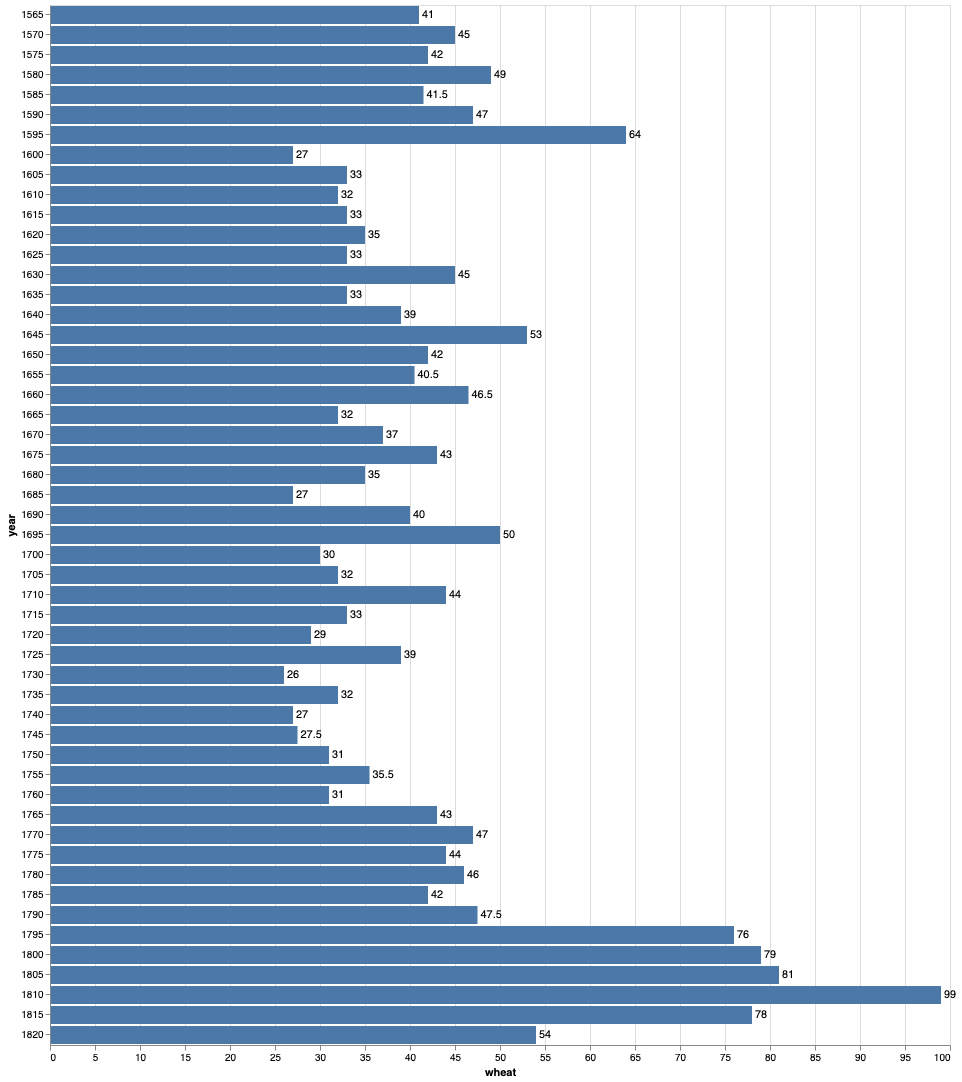

In [8]:
# Chart with text overlay
source = data.wheat()

bars = alt.Chart(source).mark_bar().encode(
    y='year:O',
    x='wheat:Q',
    # The highlight will be set on the result of of a conditional statement
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='wheat:Q'
)


(bars + text).properties(width=900)

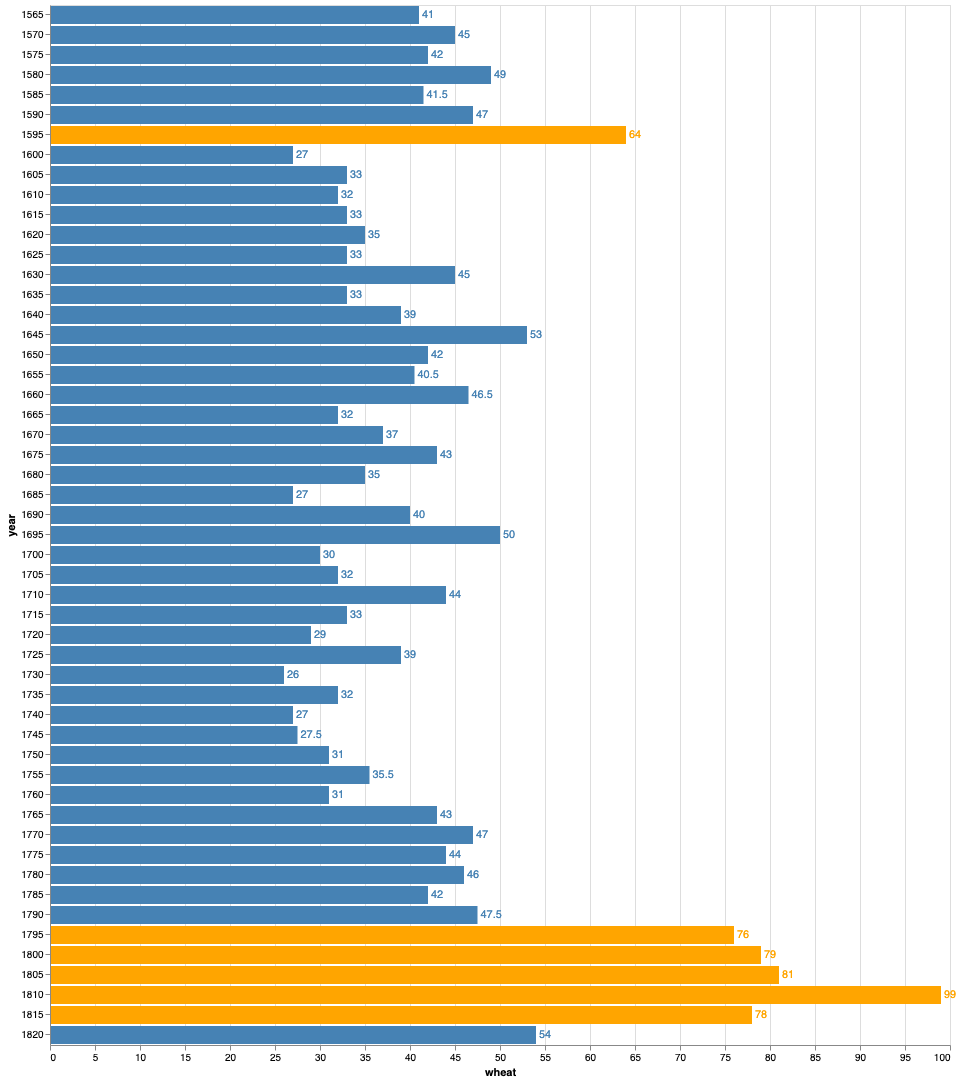

In [9]:
# Chart with text overlay and conditional colouring
source = data.wheat()

bars = alt.Chart(source).mark_bar().encode(
    y='year:O',
    x='wheat:Q',
    # The highlight will be set on the result of of a conditional statement
    color= alt.condition(
        alt.datum.wheat > 60,
        alt.value('orange'),    # If statment is true, the bar will be orange.
        alt.value('steelblue')  # If statment not true, bar will be set to blue.
))

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3 # Nudges text to the right so it doesn't appear on the top of the bar.
).encode(
    text='wheat:Q'
)


(bars + text).properties(width=900)

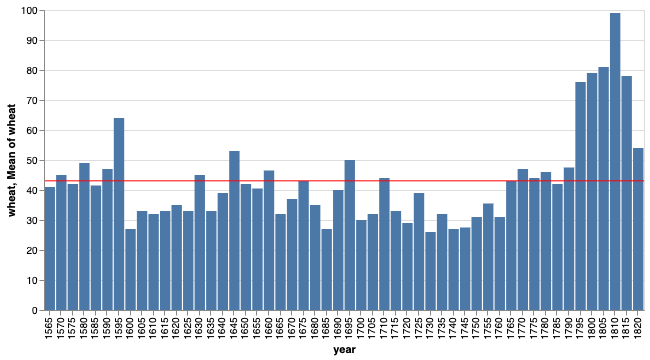

In [11]:
# Chart with mean value line
source = data.wheat()

bars = alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='wheat:Q',
    # The highlight will be set on the result of of a conditional statement
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    y='mean(wheat):Q'
)

(bars + rule).properties(width=600)

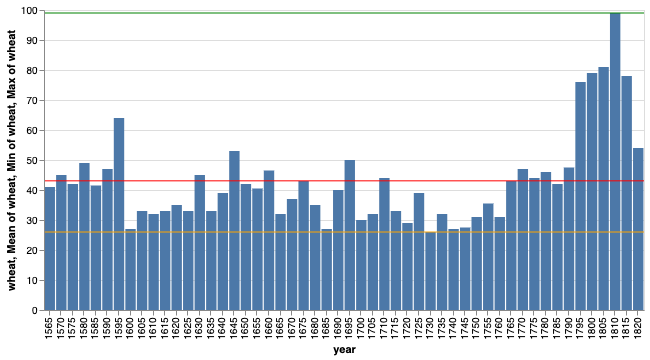

In [14]:
# Chart with mean value line, Min and Max line
source = data.wheat()

bars = alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='wheat:Q',
    # The highlight will be set on the result of of a conditional statement
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    y='mean(wheat):Q'
)

ruleMax = alt.Chart(source).mark_rule(color='green').encode(
    y='max(wheat):Q'
)

ruleMin = alt.Chart(source).mark_rule(color='orange').encode(
    y='min(wheat):Q'
)


(bars + rule + ruleMin + ruleMax).properties(width=600)

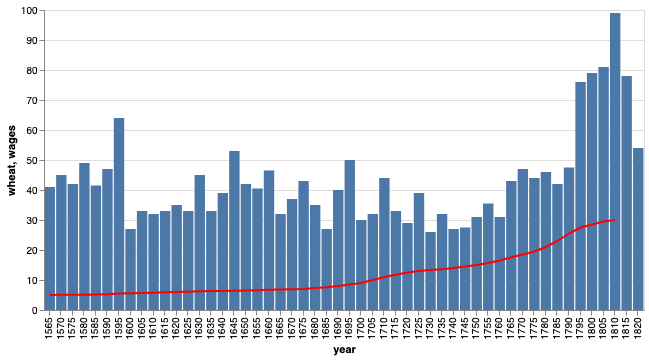

In [15]:
# Two carts on top of each other.
base = alt.Chart(source).encode(x='year:O')

bar = base.mark_bar().encode(y='wheat:Q')

line = base.mark_line(color='red').encode(
    y='wages:Q'
)

(bar + line).properties(width=600)

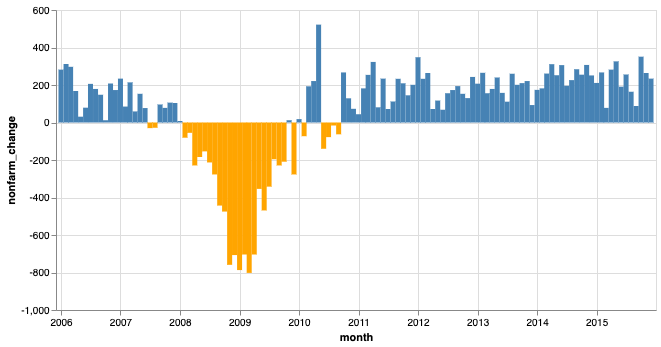

In [16]:
# Chart with negative value

source = data.us_employment()

alt.Chart(source).mark_bar().encode(
    x='month:T',
    y='nonfarm_change:Q',
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value('steelblue'),  # Positive colour
        alt.value('orange')      # Negative colour
    )
).properties(width=600)

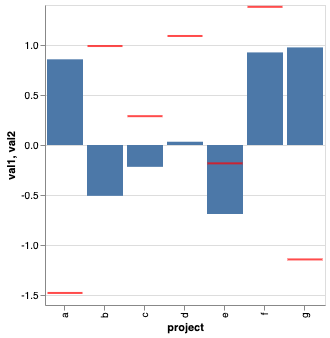

In [18]:
# Bar and Tick Charts

source = pd.DataFrame({
    'project': ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
    'val1': np.random.randn(7),
    'val2': np.random.randn(7)
})

base = alt.Chart(source)

bar = base.mark_bar().encode(
    x='project',
    y='val1'
)

tick = base.mark_tick(
    color='red',
    thickness=2
).encode(
    x='project',
    y='val2'
)

(bar + tick).configure_tick(
    bandSize=35    # Controls width of the tick
).configure_scale(
    rangeStep=40   # Controls the width of the bar
)

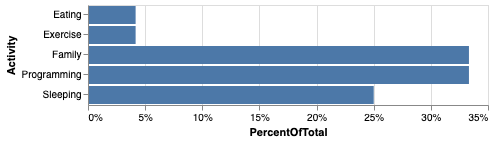

In [20]:
# Percentage Chart

source = pd.DataFrame({
    'Activity': ['Sleeping', 'Eating', 'Family', 'Programming', 'Exercise'],
    'Time': [6, 1, 8, 8, 1]
})

alt.Chart(source).mark_bar().encode(
    alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
    y='Activity:N'
).transform_window(
    TotalTime='sum(Time)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal='datum.Time / datum.TotalTime'
)

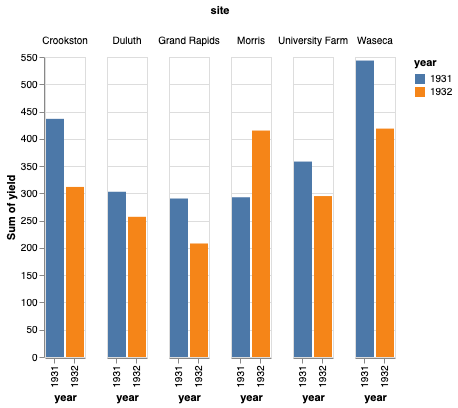

In [22]:
# Grouped Bar Charts

source = data.barley()

alt.Chart(source).mark_bar().encode(
    x='year:O',
    y='sum(yield):Q',
    color='year:N',
    column='site:N'
)